<a href="https://colab.research.google.com/github/adcaceres69/Proyecto-Final_42365/blob/main/ProyectoFinal_ARMANDO_CACERES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Se podría predecir la cantidad total de casos en una epidemia de Dengue?

El dengue es una enfermedad transmitida por mosquitos (Aedes aegypti) que se presenta en lugares con climas tropicales y subtropicales en el mundo.

La dinámica de transmisión de la enferemedad (dengue) está relacionada con variables climáticas como la temperatura y la precipitación.

En base a esto, se nos ha facilitado datos relacionados a dos ciudades, San Juan (Puerto Rico) e Iquitos (Peru), con datos de prueba para cada ciudad que abarcan 5 y 3 años respectivamente.

Los datos contenidos en el dataset son:
- Datos de ciudad y fechas (año; semanas)
- Indices de vegetación
- Precipitaciones totales
- Mediciones por reanálsis de pronósticos climáticos (precipitaciones; humedad el aire -relativa y específica-; temperaturas mínimas y máximas; rangos de temperaturas)
- Mediciones de estaciones meteorológicas

# Caracteristicas de los datos

Conjunto de información en una escala de tiempo (*year, weekofyear*):

Según corresponda, las unidades se proporcionan como un *_unit* como sufijo en el nombre del campo.

### Indicadores para ciudad y fecha
* *city*: Abreviaturas de ciudades: *sj* para San Juan y *sj* para Iquitos
* *week_start_date*: Fecha dada en formato aaaa-mm-dd

###Mediciones diarias de la estación meteorológica de datos climáticos GHCN de la NOAA:
* *station_max_temp_c*: Temperatura máxima
* *station_min_temp_c*: Temperatura mínima
* *station_avg_temp_c*: Temperatura media
* *station_precip_mm*: Precipitación total
* *station_diur_temp_rng_c*: Rango de temperatura diurna

###Mediciones de precipitación por satélite PERSIANN (escala de 0,25 x 0,25 grados):
* *precipitation_amt_mm*: Precipitación total

###Mediciones de reanálisis del sistema de pronóstico climático NCEP de la NOAA (escala de 0,5 x 0,5 grados):
* *reanalysis_sat_precip_amt_mm*: Precipitación total
* *reanalysis_dew_point_temp_k*: Temperatura media del punto de rocío
* *reanalysis_air_temp_k*: Temperatura media del aire
* *reanalysis_relative_humidity_percent*: Humedad relativa media
* *reanalysis_specific_humidity_g_per_kg*: Humedad específica media
* *reanalysis_precip_amt_kg_per_m2*: Precipitación total
* *reanalysis_max_air_temp_k*: Temperatura máxima del aire
* *reanalysis_min_air_temp_k*: Temperatura mínima del aire
* *reanalysis_avg_temp_k*: Temperatura media del aire
* *reanalysis_tdtr_k*: Rango de temperatura diurna

###Vegetación satelital - Índice de vegetación de diferencia normalizada (NDVI) - Mediciones del índice de vegetación de diferencia normalizada CDR de NOAA (escala de 0,5 x 0,5 grados):
* *ndvi_se*: Píxel al sureste del centroide de la ciudad
* *ndvi_sw*: Pixel al suroeste del centroide de la ciudad
* *ndvi_ne*: Píxel al noreste del centroide de la ciudad
* *ndvi_nw*: Pixel al noroeste del centroide de la ciudad

# Algunas Hipótesis
- Se supone la existencia de una relación entre los casos de Dengue y las precipitaciones, humedad, temperaturas, indice de vegetación.
- Se supone el crecimiento de casos por cambios climáticos a través de los años
- Se supone que predicciones precisas sobre la aparición de casos; ayudaría a los sistemas de salud a minimizar impactos

# OBJETIVO DEL PROYECTO

***Poder generar un modelo para predicción de Casos de Dengue en años venideros***

# Desarrollo del Proyecto

## Librerias y Herramientas

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings


from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV



### Cargando Datos

In [12]:
# Leyendo los datos
df_features_train = pd.read_csv('/dengue_features_train.csv')
df_labels_train = pd.read_csv('/dengue_labels_train.csv')
#df_features_test = pd.read_csv('/dengue_features_test.csv')


### Información preliminar

In [13]:
# Visualizando las primeras filas de cada conjunto de datos para entender su estructura
df_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [14]:
df_features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [15]:
df_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [16]:
df_labels_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [17]:
#df_features_test.head()

In [27]:
# Cantidad de filas y columnas en los dataset
print('El dataset "df_features_train" tiene ' + str(df_features_train.shape[0]) + ' filas, y ' + str(df_features_train.shape[1]) + ' columnas.')
print('El dataset "df_labels_train" tiene ' + str(df_labels_train.shape[0]) + ' filas, y ' + str(df_labels_train.shape[1]) + ' columnas.')

El dataset "df_features_train" tiene 1456 filas, y 24 columnas.
El dataset "df_labels_train" tiene 1456 filas, y 4 columnas.


In [19]:
# Cantidad de ciudades distintas en el dataset de features
df_features_train.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

##EDA y Data Wrangling

In [20]:
# Algunos estadisticos por ciudad
df_features_train.groupby('city').describe()

year                                                                   \
      count         mean       std     min      25%     50%      75%     max   
city                                                                           
iq    520.0  2005.000000  2.918283  2000.0  2002.75  2005.0  2007.25  2010.0   
sj    936.0  1998.826923  5.212076  1990.0  1994.00  1999.0  2003.00  2008.0   

     weekofyear             ... station_min_temp_c       station_precip_mm  \
          count       mean  ...                75%   max             count   
city                        ...                                              
iq        520.0  26.503846  ...               22.0  24.2             504.0   
sj        936.0  26.503205  ...               23.9  25.6             930.0   

                                                              
           mean        std  min     25%    50%    75%    max  
city                                                          
iq    62.467262  63.245958  0.0  17.200  45.30  85.95  543.3  
sj    26.785484  29.325811  0.0   6.825  17.75  35.45  305.9  

[2 rows x 176 columns]

In [21]:
#Rango de tiempo en los datos
print('Hay datos desde:', df_features_train.year.min(), 'hasta', df_features_train.year.max(), 'en el dataset')

Hay datos desde: 1990 hasta 2010 en el dataset


*distribución de las variables númericas en df_features*

array([[<Axes: title={'center': 'ndvi_ne'}>,
        <Axes: title={'center': 'ndvi_nw'}>,
        <Axes: title={'center': 'ndvi_se'}>,
        <Axes: title={'center': 'ndvi_sw'}>],
       [<Axes: title={'center': 'precipitation_amt_mm'}>,
        <Axes: title={'center': 'reanalysis_air_temp_k'}>,
        <Axes: title={'center': 'reanalysis_avg_temp_k'}>,
        <Axes: title={'center': 'reanalysis_dew_point_temp_k'}>],
       [<Axes: title={'center': 'reanalysis_max_air_temp_k'}>,
        <Axes: title={'center': 'reanalysis_min_air_temp_k'}>,
        <Axes: title={'center': 'reanalysis_precip_amt_kg_per_m2'}>,
        <Axes: title={'center': 'reanalysis_relative_humidity_percent'}>],
       [<Axes: title={'center': 'reanalysis_sat_precip_amt_mm'}>,
        <Axes: title={'center': 'reanalysis_specific_humidity_g_per_kg'}>,
        <Axes: title={'center': 'reanalysis_tdtr_k'}>,
        <Axes: title={'center': 'station_avg_temp_c'}>],
       [<Axes: title={'center': 'station_diur_temp_rng

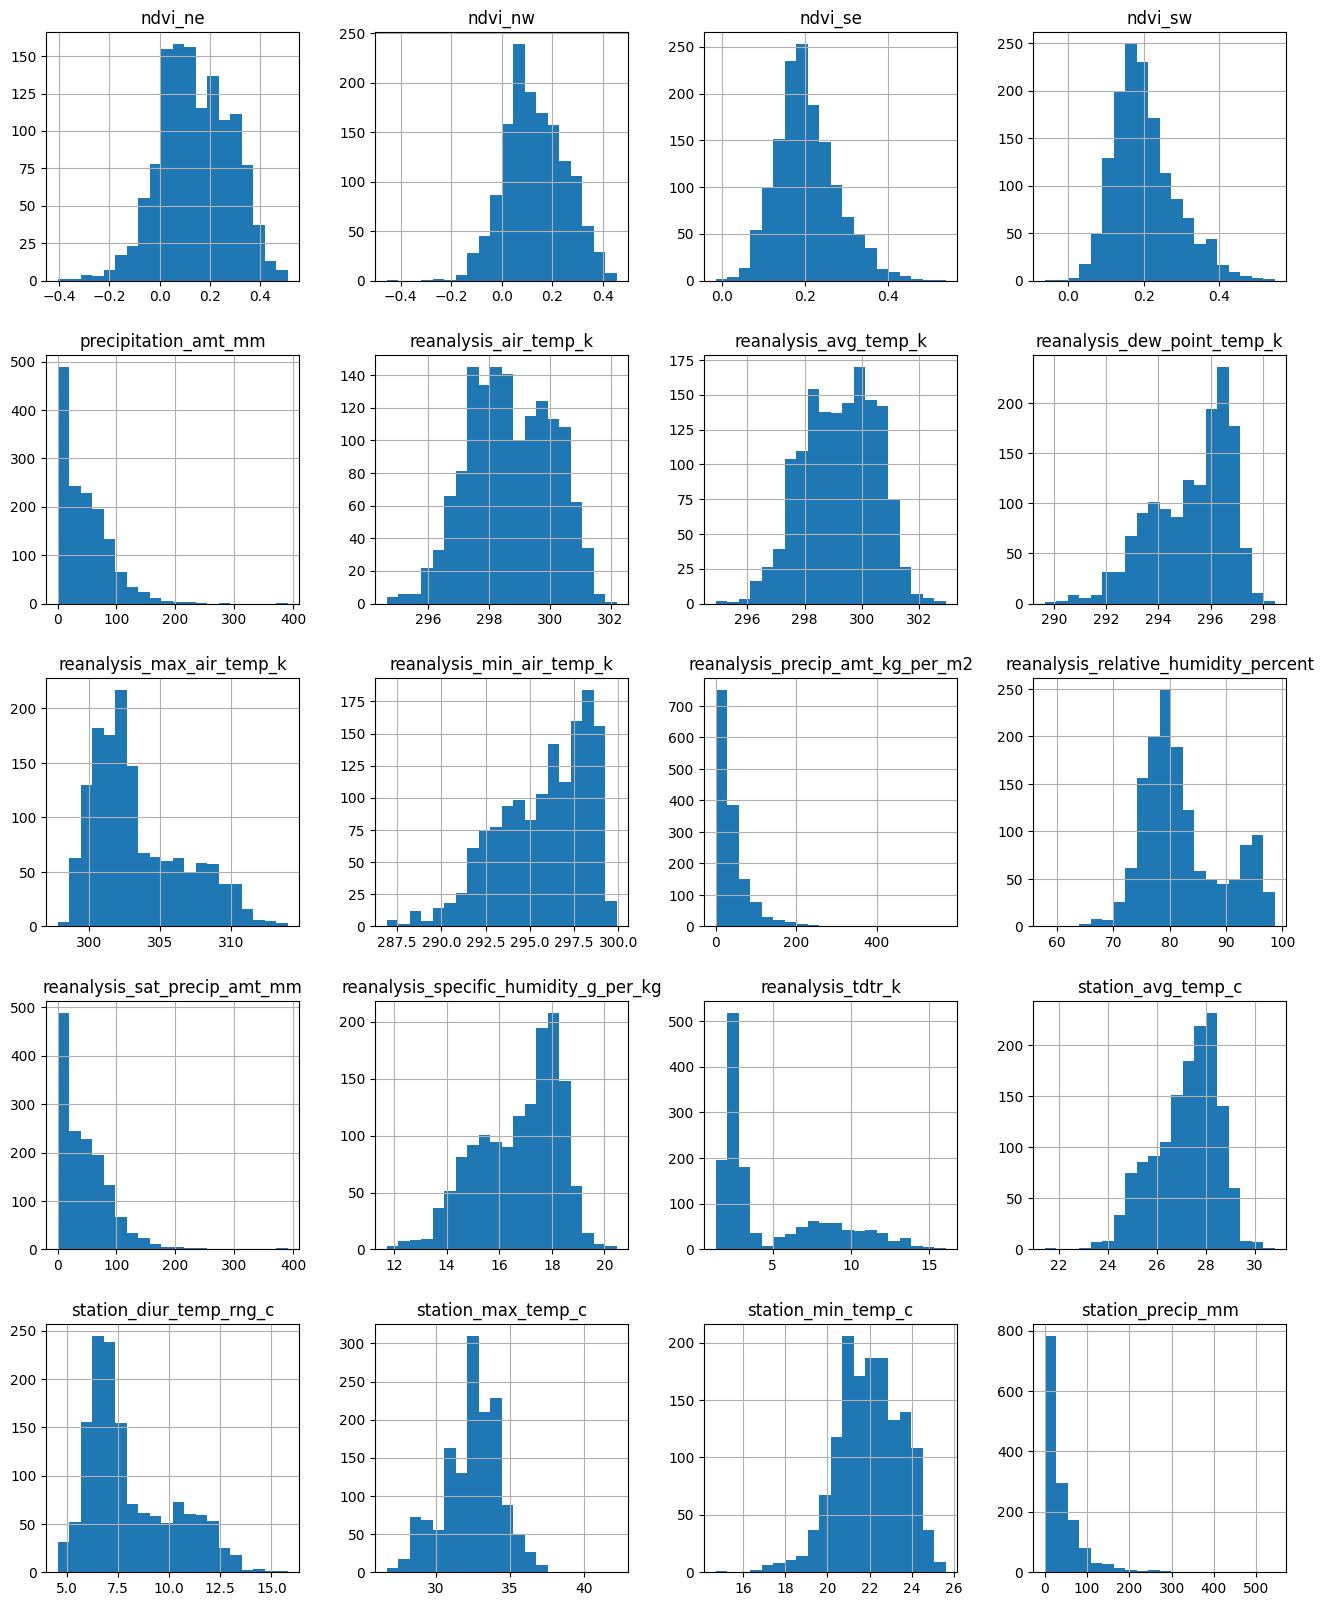

In [22]:
# excluyo las primeras 4 columnas de features para un histograma
(df_features_train[df_features_train.columns[4:]]).hist(figsize=(16,20), bins=20)

*correlación entre variables númericas*

In [23]:
# correlacion de las variables en "df_features"
(df_features_train[df_features_train.columns[4:]]).corr()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
ndvi_ne,1.000000,0.850902,0.614380,0.669504,0.205736,-0.340976,-0.037682,0.056077,0.634330,-0.623116,0.199411,0.457985,0.205736,0.094852,0.673935,0.186227,0.658129,0.491922,-0.315696,0.242263
ndvi_nw,0.850902,1.000000,0.555809,0.651938,0.193563,-0.317862,-0.030974,0.063289,0.606775,-0.588806,0.190989,0.449152,0.193563,0.100626,0.645596,0.203975,0.649483,0.490122,-0.304206,0.221314
ndvi_se,0.614380,0.555809,1.000000,0.820924,0.074633,-0.157447,0.051348,0.002810,0.468054,-0.407931,0.034792,0.215606,0.074633,0.028795,0.486047,0.089242,0.449599,0.290691,-0.251621,0.131326
ndvi_sw,0.669504,0.651938,0.820924,1.000000,0.124047,-0.227824,0.022533,0.020746,0.546460,-0.494284,0.101652,0.311759,0.124047,0.053437,0.569554,0.121060,0.545899,0.377393,-0.294684,0.158345
precipitation_amt_mm,0.205736,0.193563,0.074633,0.124047,1.000000,-0.017229,0.106384,0.434722,0.282721,-0.119691,0.481159,0.499984,1.000000,0.451202,0.201427,0.225408,0.193358,0.296215,0.076680,0.486637
reanalysis_air_temp_k,-0.340976,-0.317862,-0.157447,-0.227824,-0.017229,1.000000,0.901777,0.529771,-0.001211,0.736765,-0.128219,-0.402338,-0.017229,0.508380,-0.280375,0.619974,-0.261457,0.227768,0.719612,-0.173851
reanalysis_avg_temp_k,-0.037682,-0.030974,0.051348,0.022533,0.106384,0.901777,1.000000,0.614268,0.398224,0.436689,-0.031728,-0.168371,0.106384,0.612484,0.124200,0.751330,0.107581,0.512220,0.579864,-0.048052
reanalysis_dew_point_temp_k,0.056077,0.063289,0.002810,0.020746,0.434722,0.529771,0.614268,1.000000,0.257380,0.361781,0.432970,0.553766,0.434722,0.997051,-0.033512,0.743506,0.037151,0.492319,0.651535,0.241335
reanalysis_max_air_temp_k,0.634330,0.606775,0.468054,0.546460,0.282721,-0.001211,0.398224,0.257380,1.000000,-0.600850,0.192261,0.400093,0.282721,0.300278,0.918578,0.469668,0.834263,0.763446,-0.193709,0.251177
reanalysis_min_air_temp_k,-0.623116,-0.588806,-0.407931,-0.494284,-0.119691,0.736765,0.436689,0.361781,-0.600850,1.000000,-0.105815,-0.410714,-0.119691,0.318592,-0.815511,0.216543,-0.715676,-0.271495,0.720701,-0.237142


In [24]:
# Combinando las características y etiquetas de entrenamiento para el análisis
df_train = pd.merge(df_features_train, df_labels_train, on=['city', 'year', 'weekofyear'])

In [25]:
# Revisando valores faltantes
missing_values = df_train.isnull().sum()

In [38]:
missing_values

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

1.   Valores Faltantes:
* Varios campos, especialmente los índices NDVI y varias mediciones meteorológicas, tienen valores faltantes.

<Axes: >

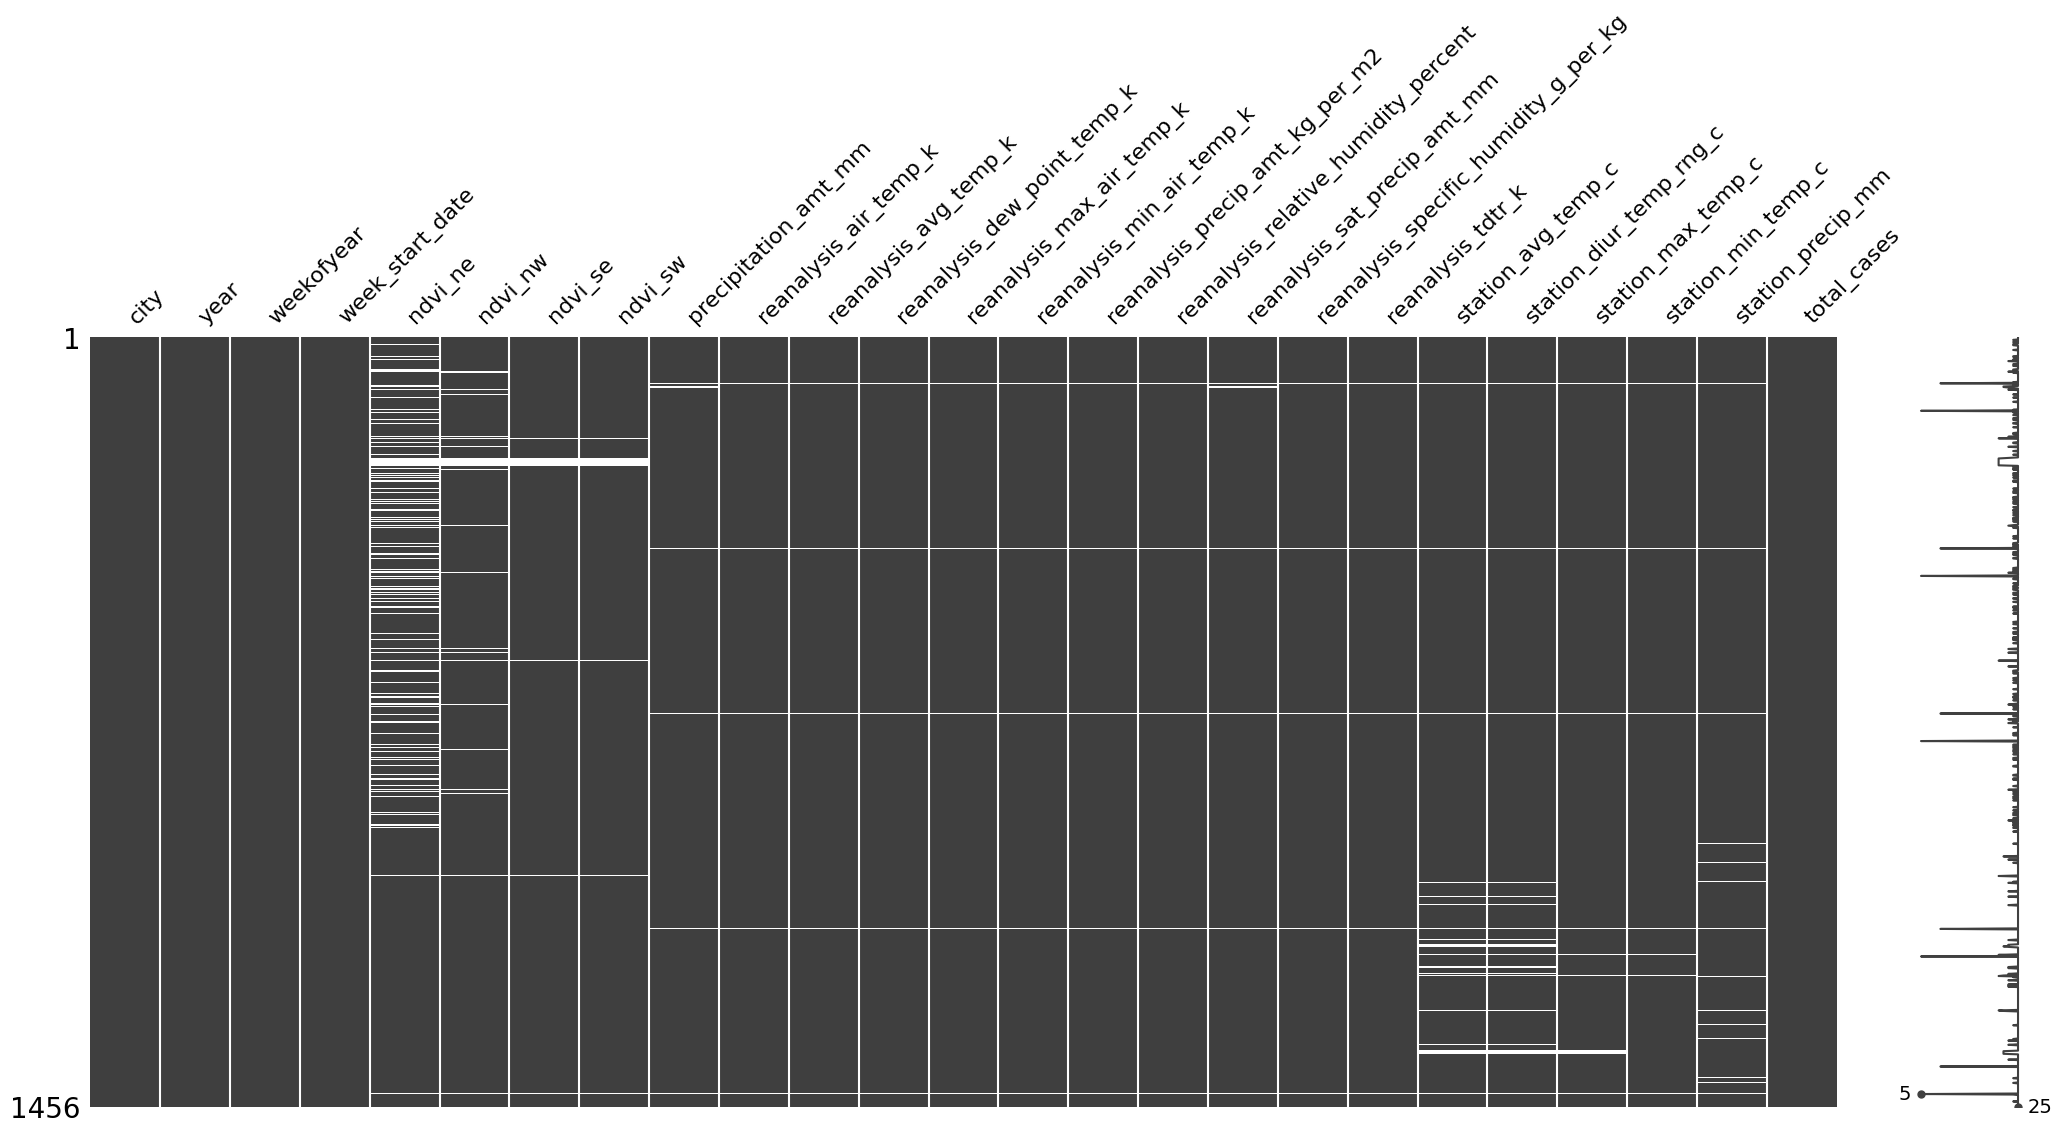

In [30]:
#La función matrix de Missingno permite ver de una forma visual dónde se encuentran los valores nulos en un conjunto de datos.
msno.matrix(df_train)

In [35]:
# analisis de la incidencia de esos datos faltantes en el total de datos

def missing_values_table(df_features_train):
        # Total de valores nulos
        mis_val = df_features_train.isnull().sum()

        # Porcentaje de valores nulos
        mis_val_percent = 100 * df_features_train.isnull().sum() / len(df_features_train)

        # Tabla de resultados
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Renombrando columnas
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores_Nulos', 1 : '% Total_de_valores'})

        # Ordeno la nueva tabla por % descendentes
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% Total_de_valores', ascending=False).round(1)

        # Mostrando información general
        print ("El dataframe seleccionado tiene " + str(df_features_train.shape[1]) + " columnas.\n"
            "Hay " + str(mis_val_table_ren_columns.shape[0]) +
              " columnas con valores nulos.")

        # Devoluelve el dataframe con la información de nulos
        return mis_val_table_ren_columns

In [37]:
# tabla de valores nulos
df_nulos= missing_values_table(df_features_train)
df_nulos

El dataframe seleccionado tiene 24 columnas.
Hay 20 columnas con valores nulos.


,Valores_Nulos,% Total_de_valores
ndvi_ne,194,13.3
ndvi_nw,52,3.6
station_diur_temp_rng_c,43,3.0
station_avg_temp_c,43,3.0
station_precip_mm,22,1.5
ndvi_sw,22,1.5
ndvi_se,22,1.5
station_max_temp_c,20,1.4
station_min_temp_c,14,1.0
precipitation_amt_mm,13,0.9


*la variable "ndvi_ne" posee un 13.3% de valores nulos y una correlación importante con "ndvi_nw"*

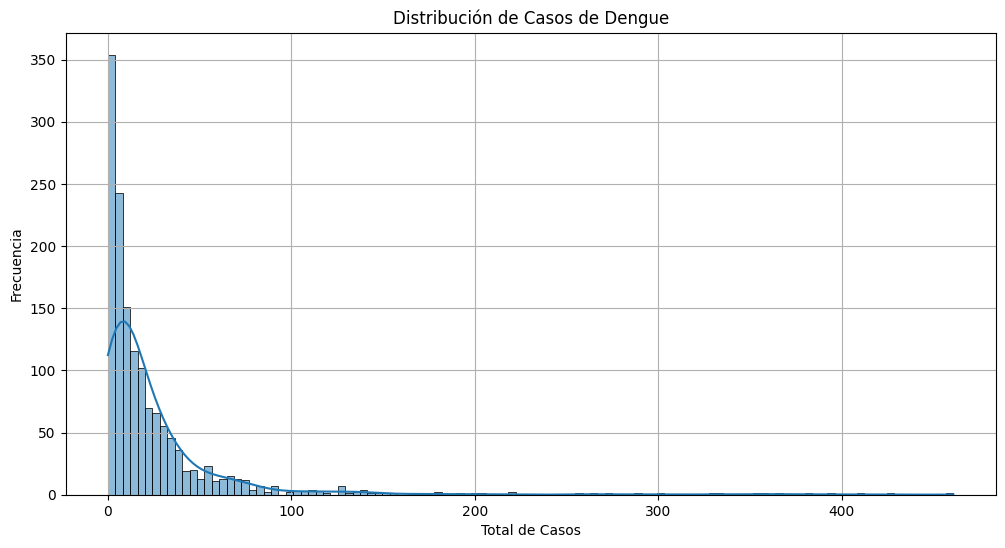

In [33]:
# Estadísticas descriptivas
description = df_train.describe()

# Distribución de casos de dengue (variable objetivo)
plt.figure(figsize=(12, 6))
sns.histplot(df_train['total_cases'], kde=True)
plt.title('Distribución de Casos de Dengue')
plt.xlabel('Total de Casos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#description, missing_values[missing_values > 0]

In [34]:
print('Caracteristicas descriptivas de todas las variables:')
description

Caracteristicas descriptivas de todas las variables:


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


1.   Estadísticas Descriptivas:
* Las variables presentan una amplia gama de valores, reflejando la diversidad de condiciones climáticas y ambientales en las ciudades estudiadas.
* La variable objetivo total_cases (casos totales de dengue) varía considerablemente, con un máximo de 461 casos en una semana.

2.   Distribución de Casos de Dengue:
* La distribución de los casos de dengue muestra una concentración en números más bajos, con algunos picos más altos que indican semanas con
brotes significativos.

*Enfoque y tratamiento de los valores faltantes - Imputación media para variables continuas*

In [39]:
# Imputación de valores faltantes
# Usaremos la imputación media para variables continuas
imputer = SimpleImputer(strategy='mean')

In [40]:
# Separando las columnas no numéricas
non_numeric_columns = df_train.select_dtypes(include=['object']).columns
df_numeric = df_train.drop(columns=non_numeric_columns)

In [41]:
# Imputación de valores faltantes en columnas numéricas
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

In [42]:
# Reincorporando las columnas no numéricas
df_train_imputed = pd.concat([df_train[non_numeric_columns], df_numeric_imputed], axis=1)

In [ ]:
#Aplicando la imputación a las columnas con valores faltantes
#df_train_imputed = df_train.copy()


In [43]:
# Verificando si aún hay valores faltantes después de la imputación
missing_values_after_imputation = df_train_imputed.isnull().sum()

# Análisis Univariado: Visualización de la distribución de algunas variables clave

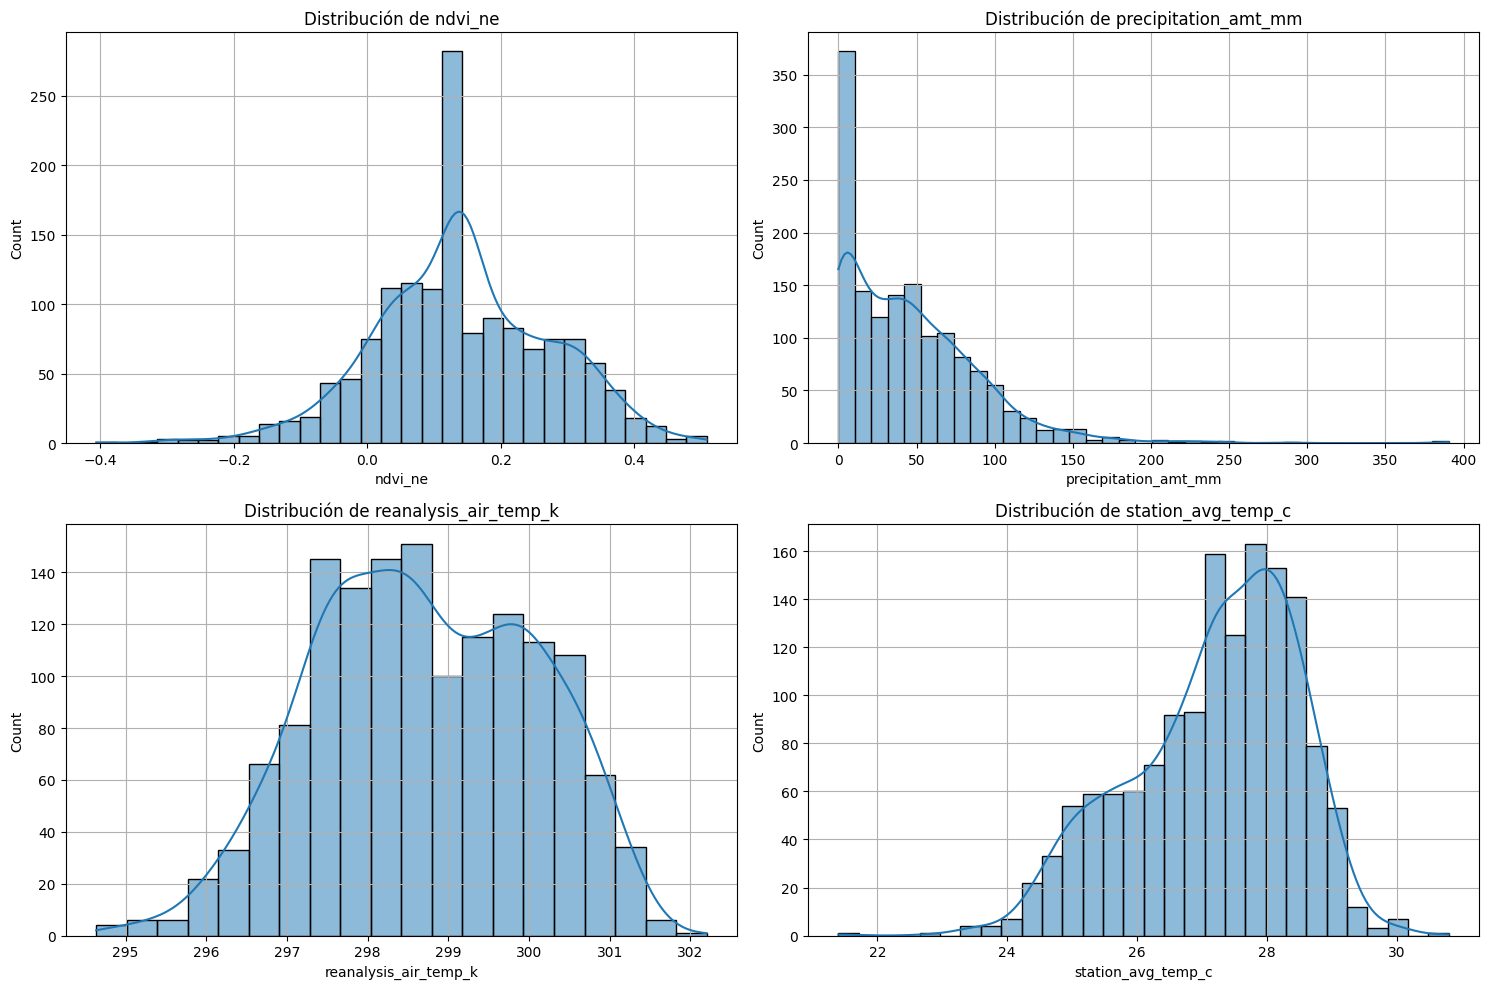

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

variables_to_plot = ['ndvi_ne', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'station_avg_temp_c']
for i, var in enumerate(variables_to_plot):
    sns.histplot(df_train_imputed[var], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribución de {var}')
    axes[i//2, i%2].grid(True)

plt.tight_layout()
plt.show()

#missing_values_after_imputation[missing_values_after_imputation > 0], df_train_imputed.describe()

In [45]:
print('Valores faltantes después de la imputación:')
missing_values_after_imputation

Valores faltantes después de la imputación:


city                                     0
week_start_date                          0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [46]:
df_train_imputed.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.130827,0.117835,0.073299,0.083266,43.519806,1.357730,1.257372,1.522551,...,7.129271,43.519806,1.537184,3.534237,1.273108,2.096879,1.945806,1.566475,47.095179,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.055625,0.051367,0.155625,0.144718,9.960000,297.665000,298.264286,294.130357,...,77.226429,9.960000,15.561429,2.328571,26.328571,6.528571,31.100000,21.100000,8.850000,5.000000
50%,2002.000000,26.500000,0.142294,0.128067,0.196998,0.190993,38.710000,298.662143,299.267857,295.625714,...,80.369286,38.710000,17.065000,2.864286,27.385714,7.385714,32.800000,22.200000,24.450000,12.000000
75%,2005.000000,39.250000,0.229292,0.212325,0.247021,0.246082,70.047500,299.827500,300.207143,296.456071,...,86.041429,70.047500,17.974643,7.553571,28.128571,9.500000,33.900000,23.300000,53.600000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


La imputación de los valores faltantes ha sido exitosa y ahora no hay valores faltantes en el conjunto de datos. Además, hemos visualizado la distribución de algunas variables clave:

1.   **NDVI (Índice de Vegetación):** Las distribuciones de NDVI para el noreste, noroeste, sureste y suroeste muestran variaciones significativas, lo cual es importante ya que el NDVI puede estar relacionado con la presencia de mosquitos portadores del dengue.

2.   **Precipitación y Temperatura:** La cantidad de precipitación y la temperatura (tanto la reanalizada como la registrada en estaciones) también varían ampliamente. Estos factores pueden influir en los patrones de brotes de dengue.

# Análisis Bivariado: Correlación entre variables y el número total de casos de dengue

In [ ]:
# Calculando la matriz de correlación
correlation_matrix = df_train_imputed.corr()

<ipython-input-18-4a442c00b8c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train_imputed.corr()


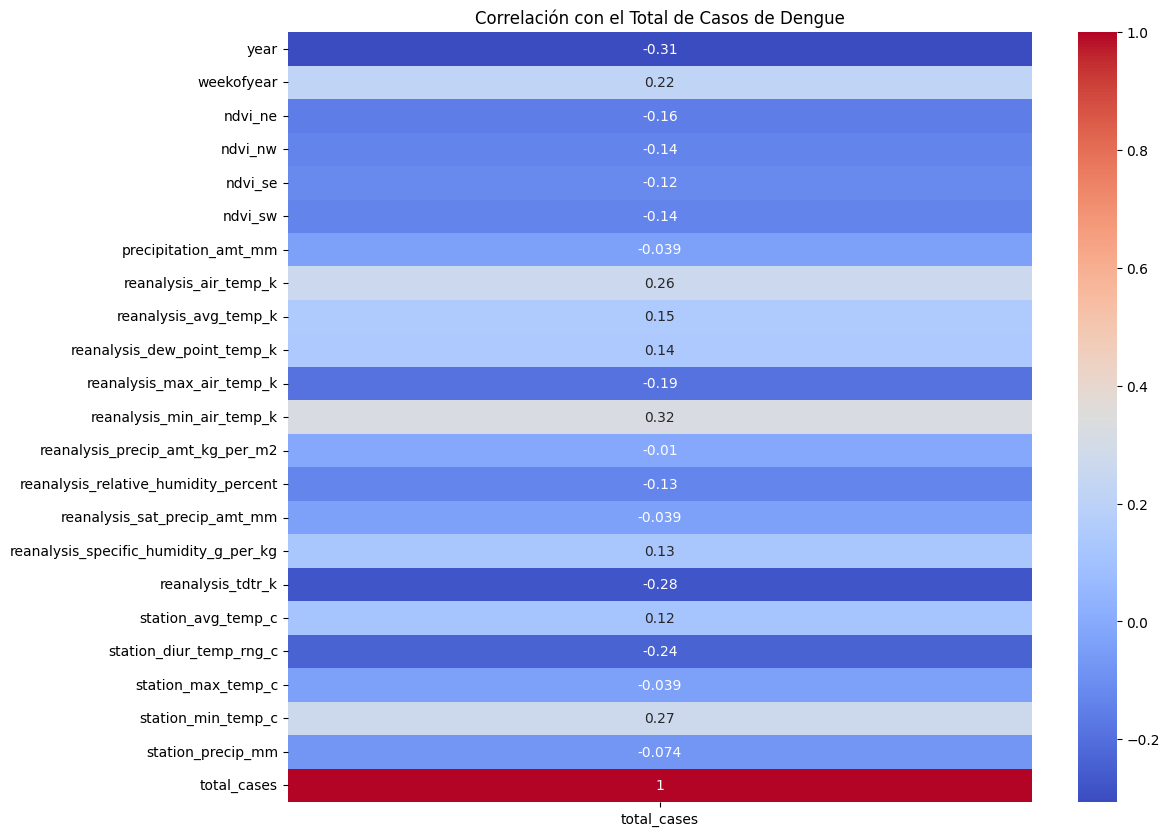

In [ ]:
# Visualización de la matriz de correlación con respecto a la variable objetivo 'total_cases'
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['total_cases']], annot=True, cmap='coolwarm')
plt.title('Correlación con el Total de Casos de Dengue')
plt.show()

In [ ]:
# Identificando las variables con mayor correlación con 'total_cases'
correlation_with_target = correlation_matrix['total_cases'].sort_values(ascending=False)
correlation_with_target

total_cases                              1.000000
reanalysis_min_air_temp_k                0.324776
station_min_temp_c                       0.266227
reanalysis_air_temp_k                    0.264564
weekofyear                               0.216452
reanalysis_avg_temp_k                    0.151415
reanalysis_dew_point_temp_k              0.142322
reanalysis_specific_humidity_g_per_kg    0.129671
station_avg_temp_c                       0.115478
reanalysis_precip_amt_kg_per_m2         -0.010016
precipitation_amt_mm                    -0.038670
reanalysis_sat_precip_amt_mm            -0.038670
station_max_temp_c                      -0.039068
station_precip_mm                       -0.074201
ndvi_se                                 -0.117769
reanalysis_relative_humidity_percent    -0.132259
ndvi_sw                                 -0.137221
ndvi_nw                                 -0.137254
ndvi_ne                                 -0.157320
reanalysis_max_air_temp_k               -0.191066


El análisis de correlación muestra cómo diferentes variables se relacionan con el total de casos de dengue:

1.   Variables Positivamente Correlacionadas:
* La temperatura mínima del aire reanalizada (reanalysis_min_air_temp_k) y la temperatura mínima registrada en la estación (station_min_temp_c) tienen una correlación positiva moderada con el total de casos de dengue. Esto sugiere que temperaturas mínimas más altas podrían estar asociadas con un aumento en los casos de dengue.
2.   Variables Negativamente Correlacionadas:
* El rango de temperatura diurno de la estación (station_diur_temp_rng_c) y la temperatura máxima del aire reanalizada (reanalysis_max_air_temp_k) muestran una correlación negativa con los casos de dengue. Esto puede indicar que una mayor variabilidad en la temperatura diaria y temperaturas máximas más bajas están asociadas con menos casos de dengue.
3.   Variables con Correlación Débil:
* Muchas variables, incluyendo las medidas de precipitación y NDVI, tienen una correlación débil con los casos de dengue. Esto no implica que no sean importantes, pero su relación con los casos de dengue podría ser más compleja o influenciada por otras variables.

*Relacion de las 5 mejores correlaciones de variables con el total de casos de dengue*

<Figure size 1200x1000 with 0 Axes>

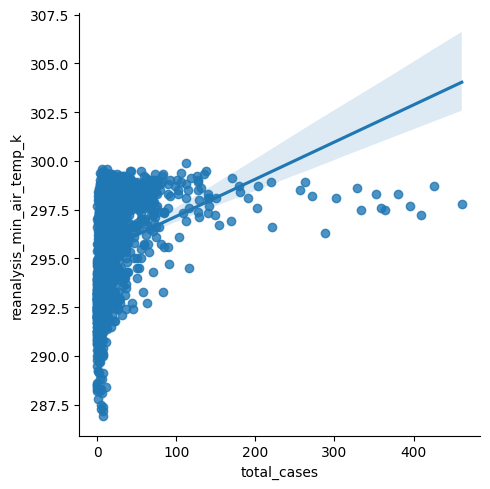

In [64]:
plt.figure(figsize=(12,10))
sns.lmplot(data=df_train_imputed, x='total_cases', y='reanalysis_min_air_temp_k')#, col='city', hue='city')


<Figure size 1200x1000 with 0 Axes>

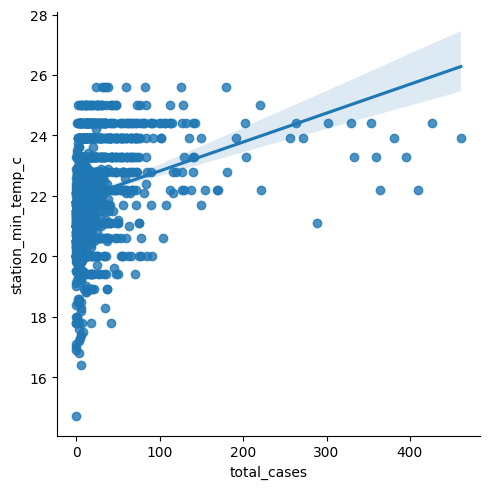

In [65]:
plt.figure(figsize=(12,10))
sns.lmplot(data=df_train_imputed, x='total_cases', y='station_min_temp_c')#, col='city', hue='city')


<Figure size 1200x1000 with 0 Axes>

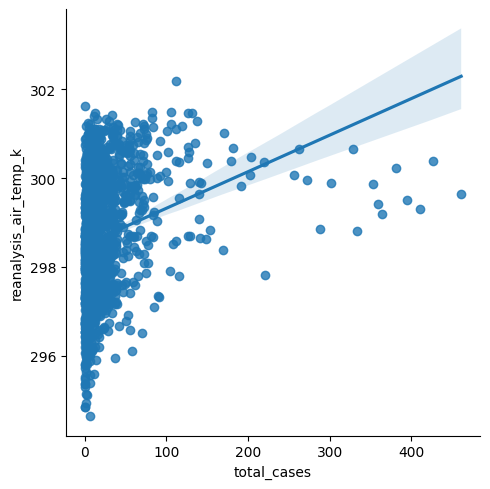

In [66]:
plt.figure(figsize=(12,10))
sns.lmplot(data=df_train_imputed, x='total_cases', y='reanalysis_air_temp_k')#, col='city', hue='city')


<Figure size 1200x1000 with 0 Axes>

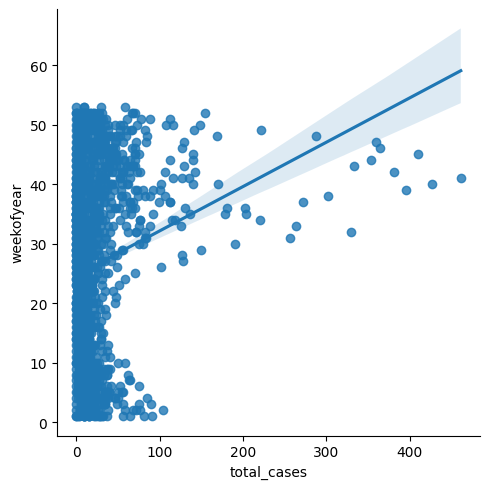

In [67]:
plt.figure(figsize=(12,10))
sns.lmplot(data=df_train_imputed, x='total_cases', y='weekofyear')#, col='city', hue='city')


<Figure size 1200x1000 with 0 Axes>

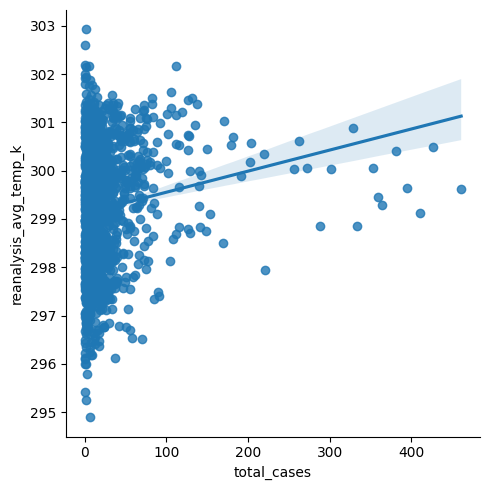

In [68]:
plt.figure(figsize=(12,10))
sns.lmplot(data=df_train_imputed, x='total_cases', y='reanalysis_avg_temp_k')#, col='city', hue='city')


### HIPOTESIS del Cambio Climático:
* se nota una disminución en el número de casos de dengue entre 1990 y 2010

In [59]:
años_prom_datos = pd.DataFrame(df_train_imputed.groupby(['year']).mean())

<ipython-input-59-b2c8dbe69f74>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  años_prom_datos = pd.DataFrame(df_train_imputed.groupby(['year']).mean())


* *Promedio total de casos por año*

<Axes: xlabel='year', ylabel='total_cases'>

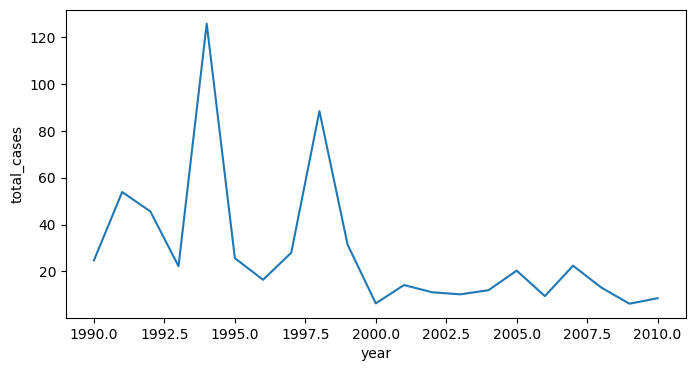

In [70]:
plt.figure(figsize=(8,4))
sns.lineplot(data=años_prom_datos, x=años_prom_datos.index, y=años_prom_datos['total_cases'])

* *Promedio total de casos por semana*

In [61]:
sem_prom_datos = pd.DataFrame(df_train_imputed.groupby(['weekofyear']).mean())

<ipython-input-61-d0626e086444>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sem_prom_datos = pd.DataFrame(df_train_imputed.groupby(['weekofyear']).mean())


<Axes: xlabel='weekofyear', ylabel='total_cases'>

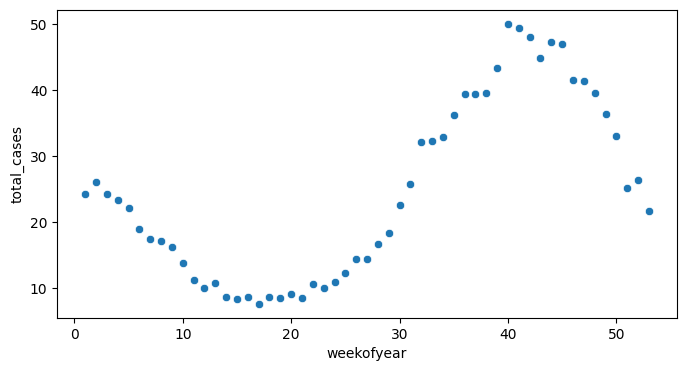

In [71]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=sem_prom_datos, x=sem_prom_datos.index, y=sem_prom_datos['total_cases'])

* *Total de casos por índice de vegetación (centroides)*


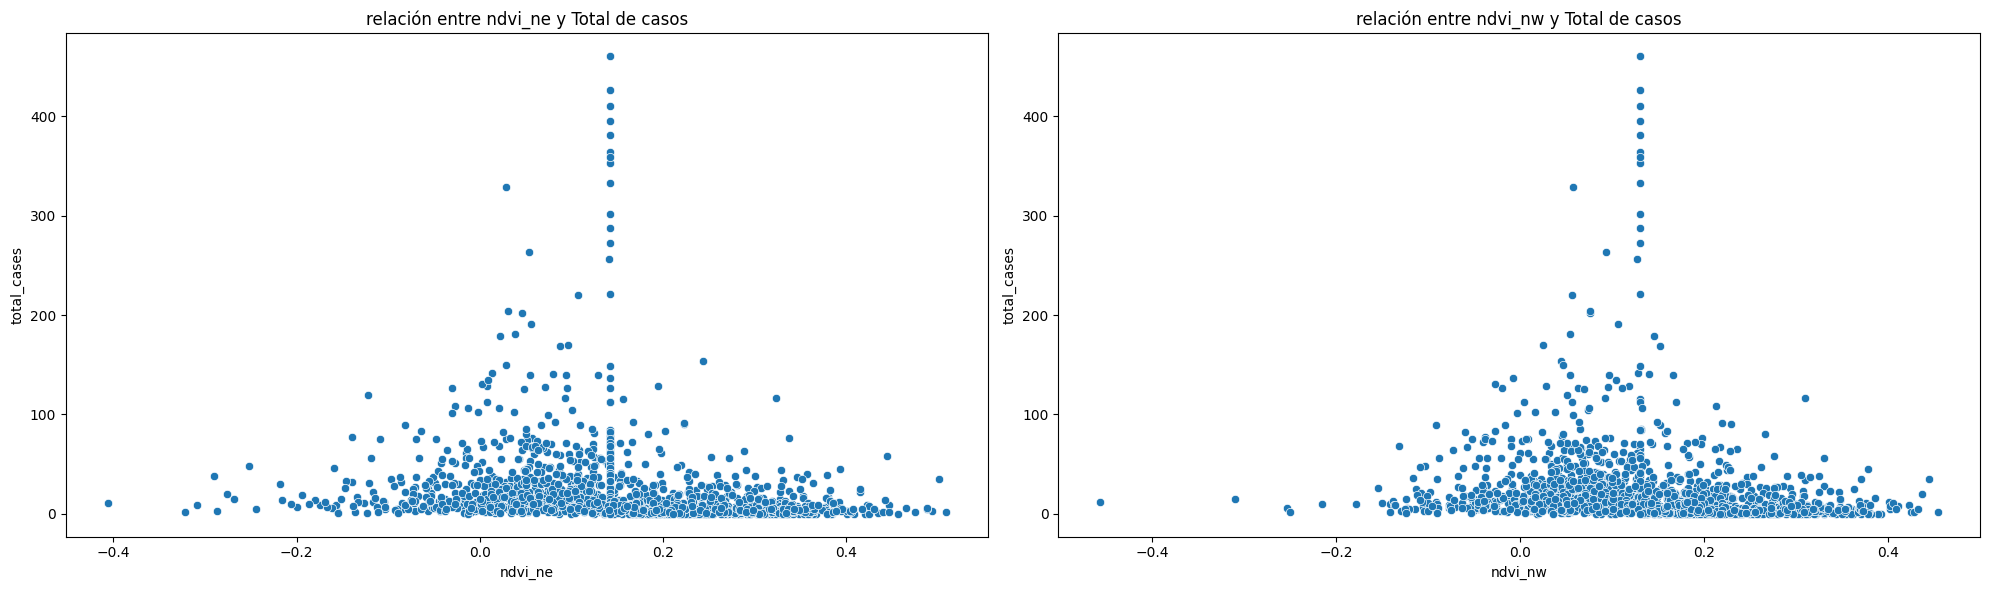

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
col2 = ['ndvi_ne', 'ndvi_nw']
for i, col in enumerate(col2):
  sns.scatterplot(data=df_train_imputed, x=col, y='total_cases', ax=axes[i])#, hue='city')
  axes[i].set_title(f'relación entre {col} y Total de casos')
plt.tight_layout() #ajusta parametros de los subgraficos para verlos mejor
plt.show()

* *Total de casos en relacion a la temperauras promedio*

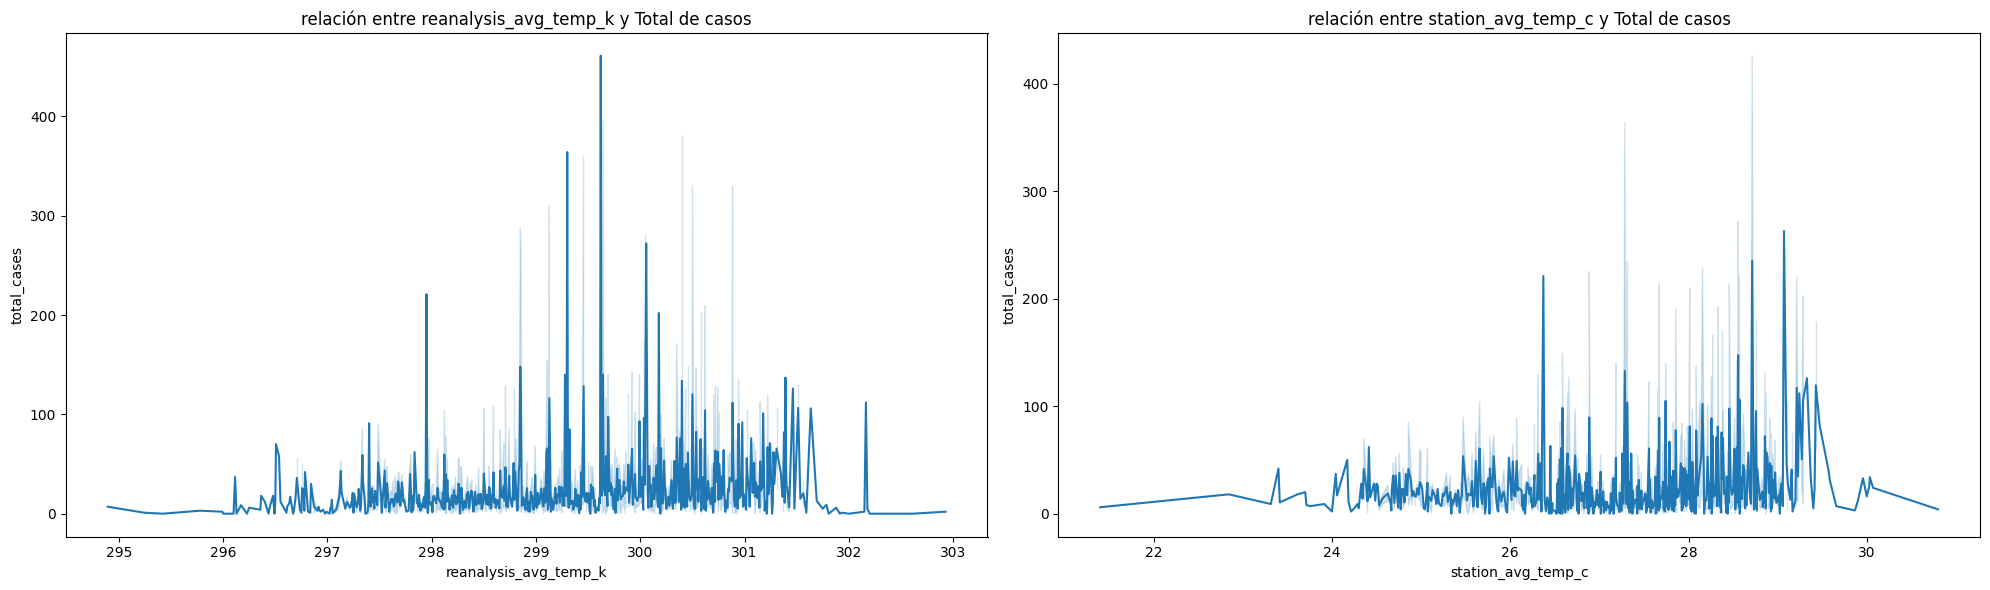

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
col2 = ['reanalysis_avg_temp_k', 'station_avg_temp_c']
for i, col in enumerate(col2):
  sns.lineplot(data=df_train_imputed, x=col, y='total_cases', ax=axes[i])
  axes[i].set_title(f'relación entre {col} y Total de casos')
plt.tight_layout() #ajusta parametros de los subgraficos para verlos mejor
plt.show()

* *Total de casos en relación a la humedad*

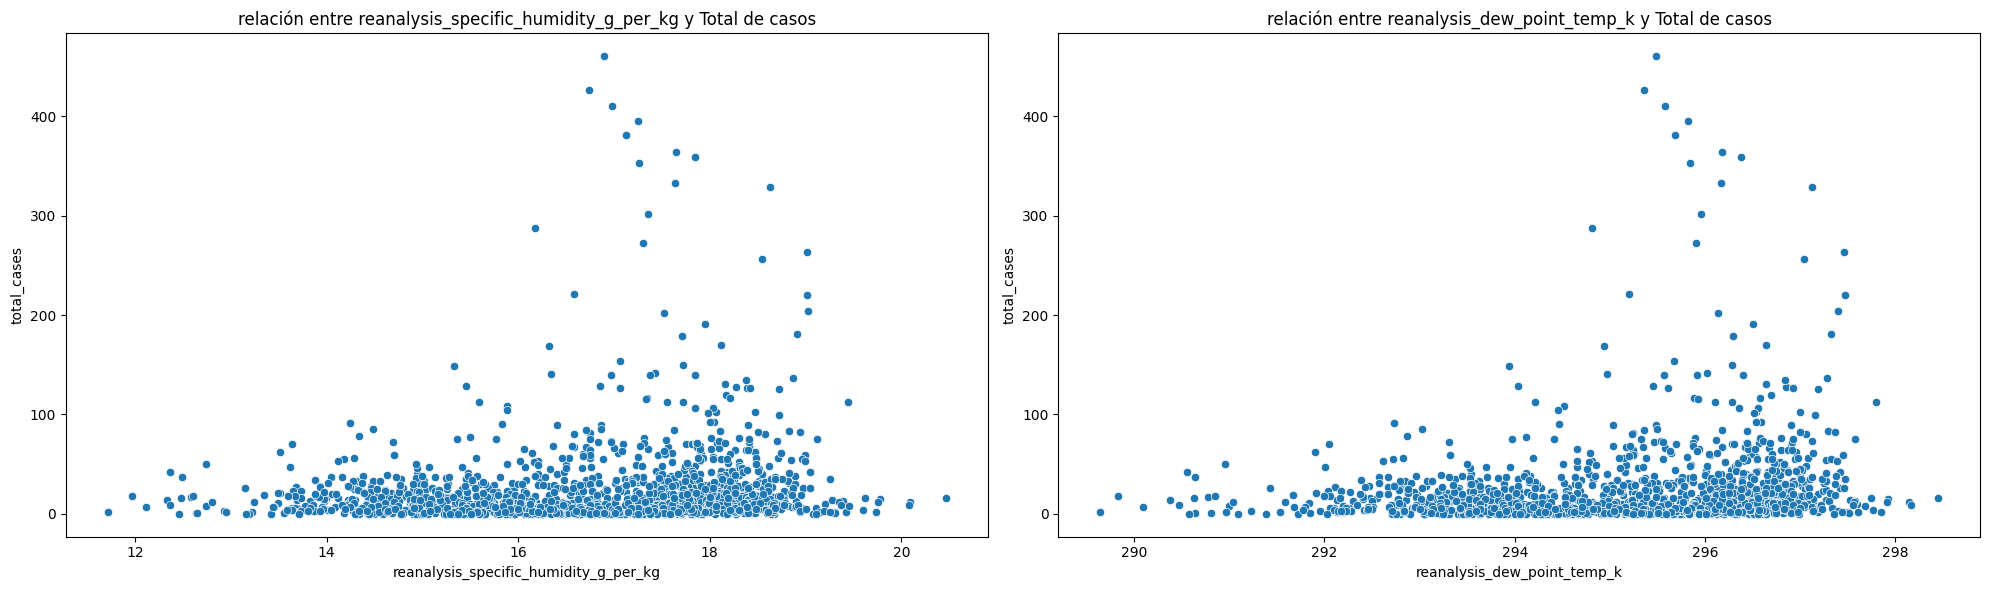

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
col2 = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k']
for i, col in enumerate(col2):
  sns.scatterplot(data=df_train_imputed, x=col, y='total_cases', ax=axes[i])
  axes[i].set_title(f'relación entre {col} y Total de casos')
plt.tight_layout() #ajusta parametros de los subgraficos para verlos mejor
plt.show()

* *Total de casos en relación a las precipitaciones*

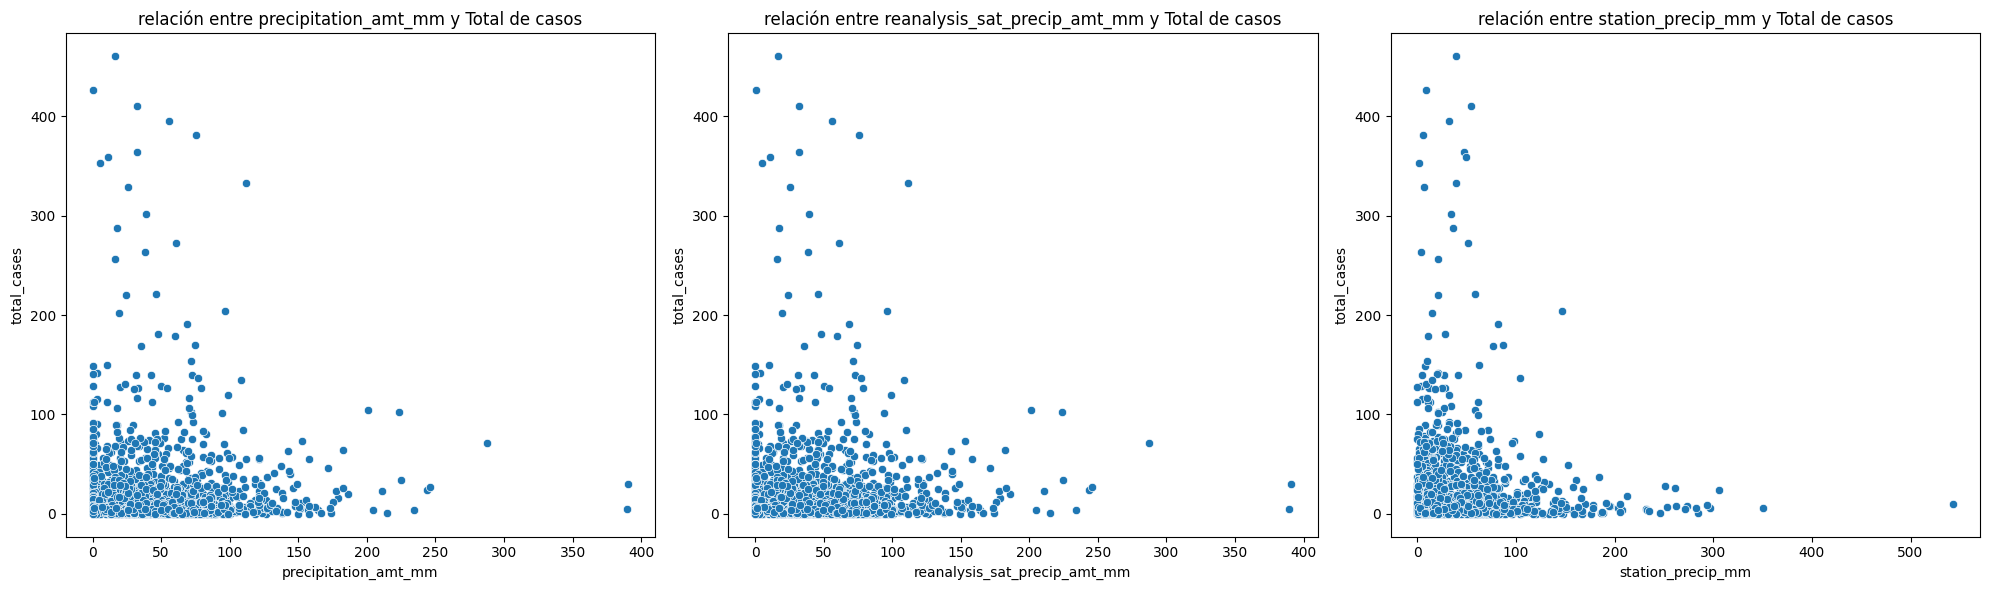

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
col2 = ['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm']
for i, col in enumerate(col2):
  sns.scatterplot(data=df_train_imputed, x=col, y='total_cases', ax=axes[i])
  axes[i].set_title(f'relación entre {col} y Total de casos')
plt.tight_layout() #ajusta parametros de los subgraficos para verlos mejor
plt.show()

# Análisis Multivariado: Matriz de Dispersión

In [78]:
df_train_imputed.corr()

<ipython-input-78-16a93a2a8d40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_imputed.corr()


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1.000000,-0.071649,0.205884,0.140678,0.231659,0.274705,0.203856,-0.139435,0.084691,0.131724,...,0.334953,0.203856,0.160925,0.488506,0.046404,0.368825,0.225454,-0.213467,0.217847,-0.306806
weekofyear,-0.071649,1.000000,0.049444,0.047594,0.119702,0.067653,0.116628,0.421344,0.458876,0.345332,...,-0.015034,0.116628,0.347188,0.077126,0.361177,0.022764,0.229398,0.288767,0.065263,0.216452
ndvi_ne,0.205884,0.049444,1.000000,0.806847,0.586294,0.644054,0.190066,-0.319536,-0.035212,0.051790,...,0.439858,0.190066,0.087625,0.646819,0.166472,0.616125,0.451473,-0.293808,0.230059,-0.157320
ndvi_nw,0.140678,0.047594,0.806847,1.000000,0.551378,0.647425,0.188732,-0.312666,-0.030483,0.062203,...,0.444201,0.188732,0.098957,0.638993,0.197132,0.632368,0.481399,-0.297125,0.217107,-0.137254
ndvi_se,0.231659,0.119702,0.586294,0.551378,1.000000,0.820924,0.074301,-0.156891,0.051201,0.002803,...,0.214727,0.074301,0.028724,0.484184,0.087292,0.440025,0.288524,-0.249873,0.129389,-0.117769
ndvi_sw,0.274705,0.067653,0.644054,0.647425,0.820924,1.000000,0.123448,-0.226935,0.022461,0.020688,...,0.310370,0.123448,0.053285,0.567162,0.118166,0.533186,0.374026,-0.292036,0.156475,-0.137221
precipitation_amt_mm,0.203856,0.116628,0.190066,0.188732,0.074301,0.123448,1.000000,-0.017219,0.106268,0.434194,...,0.499775,1.000000,0.450606,0.201322,0.223063,0.191542,0.295173,0.076422,0.483763,-0.038670
reanalysis_air_temp_k,-0.139435,0.421344,-0.319536,-0.312666,-0.156891,-0.226935,-0.017219,1.000000,0.901777,0.529771,...,-0.402338,-0.017219,0.508380,-0.280375,0.609638,-0.257098,0.226277,0.719191,-0.173012,0.264564
reanalysis_avg_temp_k,0.084691,0.458876,-0.035212,-0.030483,0.051201,0.022461,0.106268,0.901777,1.000000,0.614268,...,-0.168371,0.106268,0.612484,0.124200,0.741190,0.106129,0.509621,0.579693,-0.047698,0.151415
reanalysis_dew_point_temp_k,0.131724,0.345332,0.051790,0.062203,0.002803,0.020688,0.434194,0.529771,0.614268,1.000000,...,0.553766,0.434194,0.997051,-0.033512,0.732584,0.036606,0.491283,0.650624,0.239589,0.142322


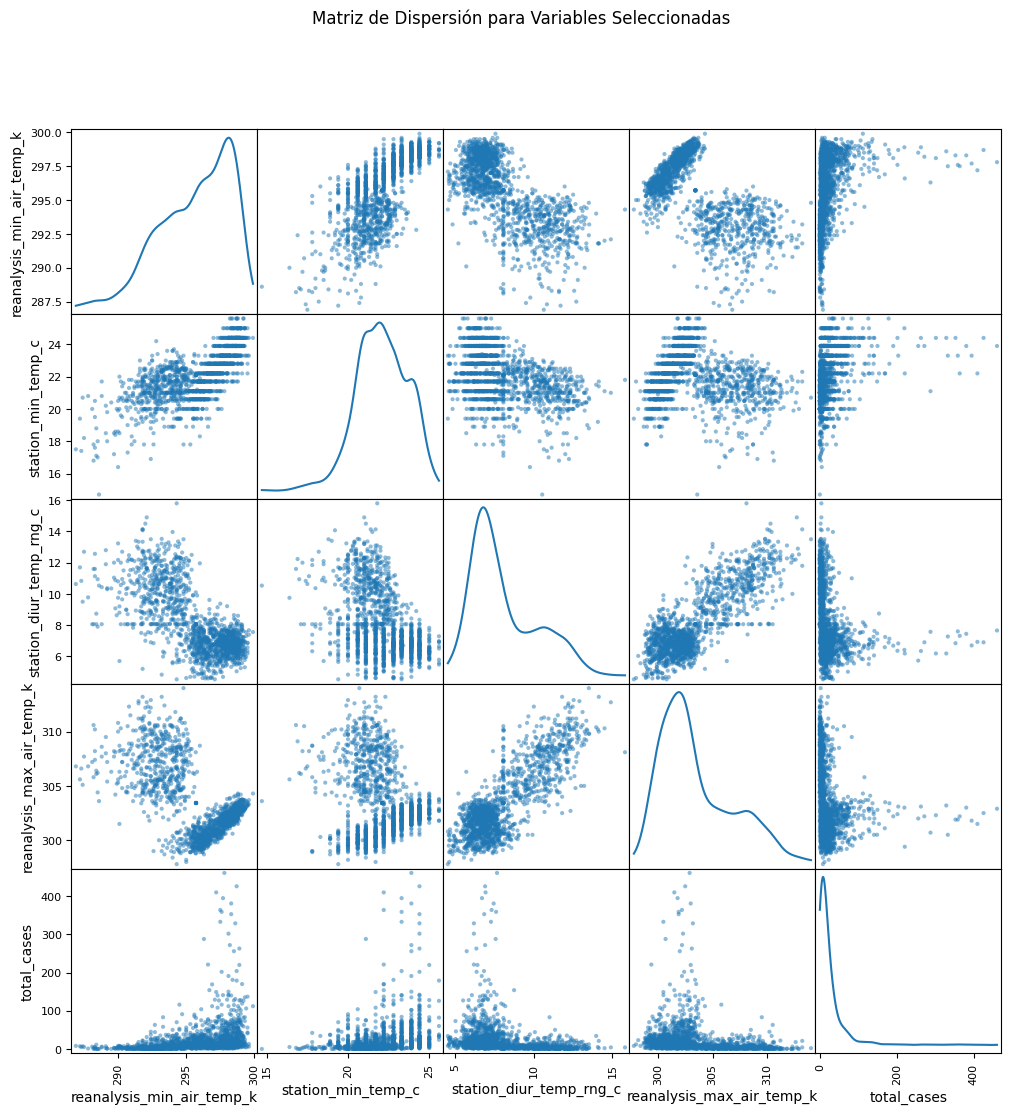

In [79]:
# Seleccionando algunas de las variables con mayor correlación para el análisis multivariado
variables_seleccionadas = ['reanalysis_min_air_temp_k', 'station_min_temp_c', 'station_diur_temp_rng_c',
                      'reanalysis_max_air_temp_k', 'total_cases']

# Creando una matriz de dispersión para estas variables
scatter_matrix(df_train_imputed[variables_seleccionadas], figsize=(12, 12), diagonal='kde')
plt.suptitle('Matriz de Dispersión para Variables Seleccionadas')
plt.show()

La matriz de dispersión muestra las relaciones entre algunas de las variables que tienen una correlación significativa con el total de casos de dengue:

1.   Relaciones entre Variables Climáticas:
* Las relaciones entre las diferentes variables de temperatura (como la temperatura mínima del aire y la temperatura máxima del aire) parecen seguir patrones lineales o cuasi-lineales. Esto es esperado, ya que estas variables están intrínsecamente relacionadas.
2.   Relación con el Total de Casos de Dengue:
* La relación entre las variables climáticas y el total de casos de dengue no muestra un patrón lineal claro, lo que sugiere que la relación podría ser no lineal o que existen otros factores que también influyen en el número de casos de dengue.
3.   Distribuciones de las Variables:
* Las distribuciones en la diagonal muestran la distribución de cada variable. Se observa que algunas variables, como la temperatura, tienen una distribución relativamente normal, mientras que la distribución de los casos de dengue es asimétrica, con una concentración en números más bajos y algunos picos más altos.

## MODELIZACIÓN

* Aplicaremos modelos de regresion supervisados:
 * Utilizaremos el modelo de Support Vector Regression (SVR)
 * Utilizaremos el modelo de Random Forest Regression (RFR)
 * Utilizaremos el modelo de XGBoosting Regression (GBR)
* Exploraremos técnicas de bagging y boosting para mejorar los modelos; mediremos y evaluaremos sus metricas de desempeño.

In [80]:
# Preparando los datos para el modelado
X = df_train_imputed.drop(['city', 'week_start_date', 'total_cases'], axis=1)
y = df_train_imputed['total_cases']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [82]:
# Inicialización de modelos
svr = SVR()
rfr = RandomForestRegressor(random_state=42)
xgboost = GradientBoostingRegressor(random_state=42)


In [83]:
# Entrenamiento de modelos
svr.fit(X_train_scaled, y_train)
rfr.fit(X_train, y_train)
xgboost.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [84]:
# Predicciones
y_pred_svr = svr.predict(X_test_scaled)
y_pred_rfr = rfr.predict(X_test)
y_pred_xgboost = xgboost.predict(X_test)


In [85]:
# Cálculo de métricas de rendimiento
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)

r2_svr = r2_score(y_test, y_pred_svr)
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

performance_metrics = {
    'Model': ['SVR', 'Random Forest', 'XGBoost'],
    'MSE': [mse_svr, mse_rfr, mse_xgboost],
    'R2 Score': [r2_svr, r2_rfr, r2_xgboost]
}


In [86]:
df_performance = pd.DataFrame(performance_metrics)
df_performance.set_index('Model', inplace=True)
df_performance

,MSE,R2 Score
Model,,
SVR,3152.531563,0.017940
Random Forest,1125.321301,0.649446
XGBoost,1132.300547,0.647272


**Resultados de Modelización**

Se entrenaron tres modelos diferentes (SVR, RFR y XGBoost); además se ha evaluado su rendimiento utilizando dos métricas claves: el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R2 Score).

Los resultados:
1.   SVR:
  *   MSE: 3152.53
  *   R2 Score: 0.0179
2.   RFR
  *   MSE: 1125.32
  *   R2 Score: 0.6494
3.   XGBoost
  *   MSE: 1132.30
  *   R2 Score: 0.6473

**Interpretación**
* Random Forest y XGBoost muestran un rendimiento significativamente mejor en comparación con SVR. Ambos tienen un MSE mucho menor y un R2 Score más alto, lo que indica una mayor precisión y capacidad para explicar la variabilidad de los datos.

* SVR ha tenido un rendimiento relativamente bajo en este caso. Esto podría deberse a la naturaleza de los datos o a la necesidad de una configuración más fina de los hiperparámetros.

* Entre Random Forest y XGBoost, los resultados son muy similares, con Random Forest teniendo una ligera ventaja en ambas métricas.

##   A continuacion ajustaremos los hiperparametros del RFR y XGBoost, para luego evaluar mejoras

In [87]:
# Ajuste de hiperparámetros para Random Forest
param_grid_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid_rfr, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rfr.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [88]:
# Mejores parámetros y mejor score para Random Forest
best_params_rfr = grid_search_rfr.best_params_
best_score_rfr = -grid_search_rfr.best_score_


In [89]:
# Ajuste de hiperparámetros para XGBoost
param_grid_xgboost = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_xgboost = GridSearchCV(estimator=xgboost, param_grid=param_grid_xgboost, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_xgboost.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [90]:
# Mejores parámetros y mejor score para XGBoost
best_params_xgboost = grid_search_xgboost.best_params_
best_score_xgboost = -grid_search_xgboost.best_score_


In [91]:
print('Los mejores paramétros para Random Forest son:', best_params_rfr, '\n con un score de', best_score_rfr)

Los mejores paramétros para Random Forest son: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200} 
 con un score de 685.3302441760935


In [92]:
print('Los mejores paramétros para el XGBoost son:', best_params_xgboost, '\n con un score de', best_score_xgboost)

Los mejores paramétros para el XGBoost son: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300} 
 con un score de 517.4852934677137


* utilizaremos algunos hiperparámetros recomendados para ver si podemos mejoras las metricas

In [93]:
# Configuración de hiperparámetros para Random Forest
rfr_tuned = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)

# Configuración de hiperparámetros para XGBoost
xgboost_tuned = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)


In [94]:
# Entrenando modelos con hiperparámetros ajustados
rfr_tuned.fit(X_train_scaled, y_train)
xgboost_tuned.fit(X_train_scaled, y_train) ### estaba X_train SOLO


GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [95]:
# Predicciones con modelos ajustados
y_pred_rfr_tuned = rfr_tuned.predict(X_test_scaled)
y_pred_xgboost_tuned = xgboost_tuned.predict(X_test_scaled)


In [96]:
# Cálculo de métricas de rendimiento para los modelos ajustados
mse_rfr_tuned = mean_squared_error(y_test, y_pred_rfr_tuned)
mse_xgboost_tuned = mean_squared_error(y_test, y_pred_xgboost_tuned)

r2_rfr_tuned = r2_score(y_test, y_pred_rfr_tuned)
r2_xgboost_tuned = r2_score(y_test, y_pred_xgboost_tuned)


In [97]:
# Creando un DataFrame para comparar los rendimientos
performance_metrics_tuned = {
    'Model': ['Random Forest Tuned', 'XGBoost Tuned'],
    'MSE': [mse_rfr_tuned, mse_xgboost_tuned],
    'R2 Score': [r2_rfr_tuned, r2_xgboost_tuned]
}


In [98]:
df_performance_tuned = pd.DataFrame(performance_metrics_tuned)
df_performance_tuned.set_index('Model', inplace=True)
df_performance_tuned

,MSE,R2 Score
Model,,
Random Forest Tuned,1145.567736,0.643139
XGBoost Tuned,870.142910,0.728938


**Resultados de Modelización con Hiperparámetros Ajustados**

Los modelos Random Forest y XGBoost han sido ajustados con un conjunto de hiperparámetros basado en experiencias y recomendaciones comunes. Aquí están los resultados de rendimiento para cada modelo:



1.   Random Forest Ajustado:
* MSE: 1145.57
* R2 Score: 0.6431

2.   XGBoost Ajustado:
* MSE: 870.14
* R2 Score: 0.7289

**Interpretación**
* **XGBoost Ajustado** muestra un rendimiento superior en comparación con Random Forest Ajustado, tanto en términos de MSE más bajo como de un mayor R2 Score. Esto indica una mayor precisión y una mejor capacidad para explicar la variabilidad de los casos de dengue.

* La mejora en el rendimiento respecto a las versiones no ajustadas de estos modelos muestra que *la selección y ajuste de hiperparámetros es un paso importante en la modelización.*

## Graficamos los valores reales vs. los valores predichos

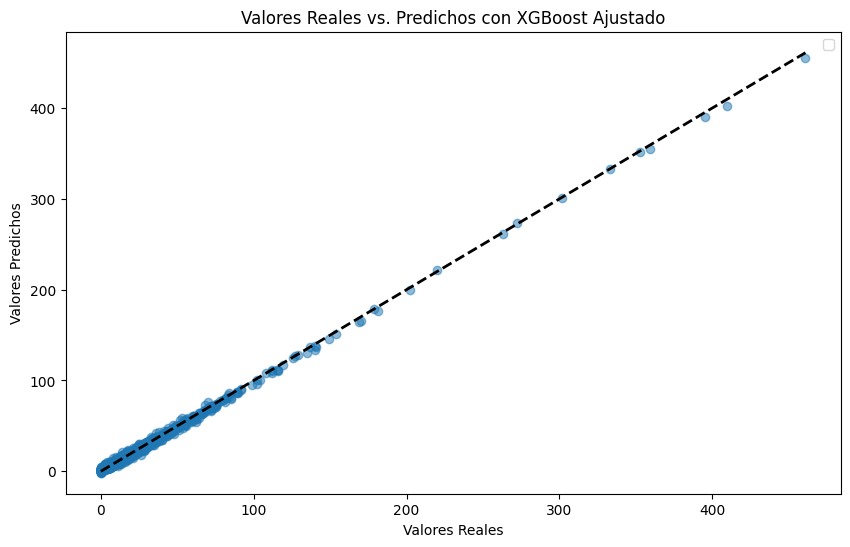

In [105]:
# Realizando predicciones en el conjunto de prueba con el modelo XGBoost ajustado
y_pred_train = xgboost_tuned.predict(X_train_scaled)

# Creando un gráfico de dispersión para comparar los valores reales y los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos con XGBoost Ajustado')
plt.legend()
plt.show()

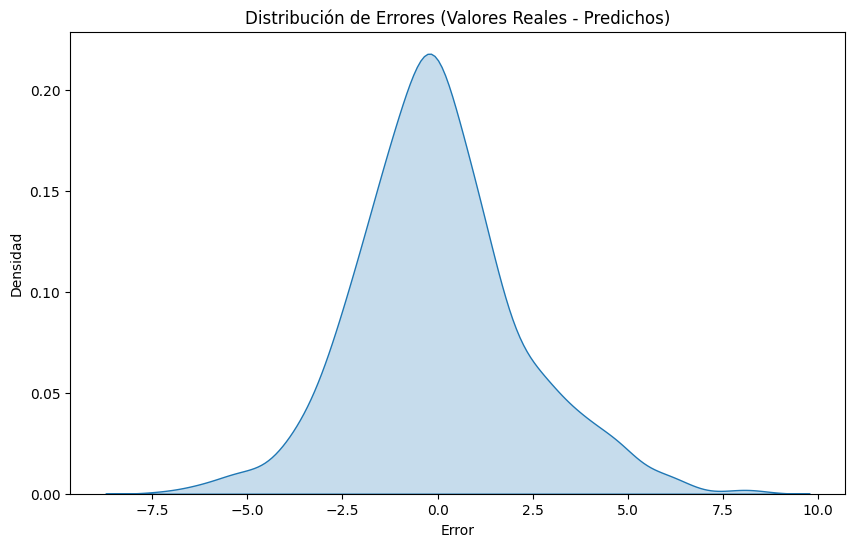

In [106]:
# Calculando los errores (diferencia entre valores reales y predichos)
errores = y_train - y_pred_train

# Creando un gráfico de densidad para los errores
plt.figure(figsize=(10, 6))
sns.kdeplot(errores, fill=True)
plt.title('Distribución de Errores (Valores Reales - Predichos)')
plt.xlabel('Error')
plt.ylabel('Densidad')
plt.show()

* visto de otro modo; los valores residuos se distribuyen de forma similar en ambos conjuntos de datos.

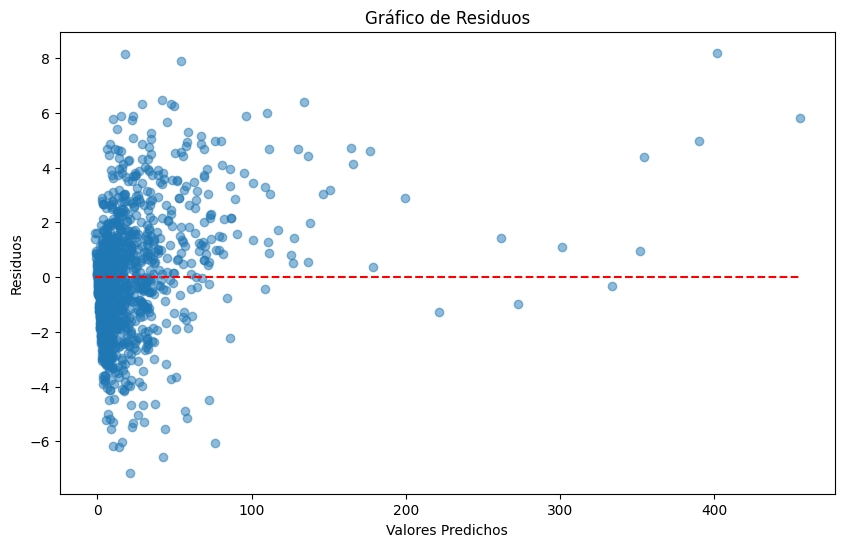

In [107]:
# Calculando los residuos
residuos = y_train - y_pred_train

# Creando un gráfico de residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuos, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_train.min(), xmax=y_pred_train.max(), colors='red', linestyles='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

# Analizaremos las caracteristicas del Modelo XGBoost

In [99]:
# Calculando la importancia de las características en el modelo XGBoost ajustado
feature_importances_xgboost = xgboost_tuned.feature_importances_


In [100]:
# Creando un DataFrame para visualizar las importancias
features = X_train.columns
df_feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances_xgboost})
df_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)


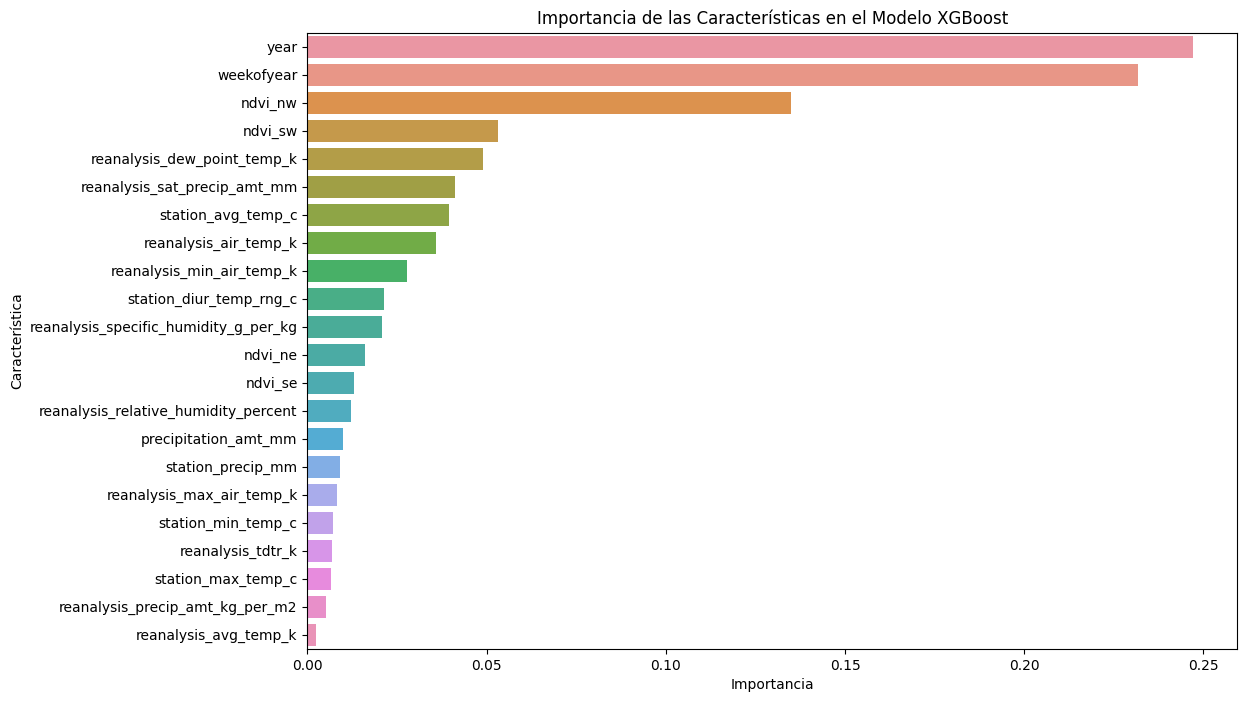

In [101]:
# Visualización de las importancias de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_feature_importances)
plt.title('Importancia de las Características en el Modelo XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


In [103]:
# Mostramoo las 10 variables con las características más importantes
df_feature_importances.head(10)

,Feature,Importance
0,year,0.247114
1,weekofyear,0.231860
3,ndvi_nw,0.134860
5,ndvi_sw,0.053208
9,reanalysis_dew_point_temp_k,0.049065
14,reanalysis_sat_precip_amt_mm,0.041185
17,station_avg_temp_c,0.039566
7,reanalysis_air_temp_k,0.035904
11,reanalysis_min_air_temp_k,0.027912
18,station_diur_temp_rng_c,0.021444


El análisis de la importancia de las características en el modelo XGBoost ajustado revela las siguientes observaciones:



1.   Variables más Influyentes:
* Año (year) y Semana del Año (weekofyear) son las características más importantes, lo que sugiere que hay tendencias temporales significativas en los casos de dengue.
* El NDVI en el noroeste (ndvi_nw) también es una característica influyente, lo que indica la relevancia de las condiciones de la vegetación en la propagación del dengue.

2.   Variables Climáticas:
* Varios indicadores climáticos como la temperatura del punto de rocío reanalizada (reanalysis_dew_point_temp_k), la cantidad de precipitación reanalizada (reanalysis_sat_precip_amt_mm), y la temperatura media en estación (station_avg_temp_c); entre otros, son importantes. Esto resalta el impacto del clima en la incidencia del dengue.

3.   Otros Factores Ambientales:
* Otros índices NDVI (ndvi_sw) y variables de temperatura (reanalysis_air_temp_k, reanalysis_min_air_temp_k, station_diur_temp_rng_c) también muestran una importancia en menor grado.


## CONCLUSIONES
* Estos resultados pueden ayudar a dirigir esfuerzos de investigación y políticas públicas hacia los factores más influyentes en la propagación del dengue.
* La integración de estas variables en modelos predictivos y estrategias de prevención puede mejorar la capacidad de manejar y prevenir brotes de dengue.

## Aqui estoy usando el conjunto de datos de prueba "dengue_features_test.csv" que se encuentra en la misma carpeta que este notebook.
* Realizaremos las predicciones con el mejor modelo ajustado, la comparacion respectiva con el resto de modelos y obtenemos un conjunto de predicciones en un archivo CSV.

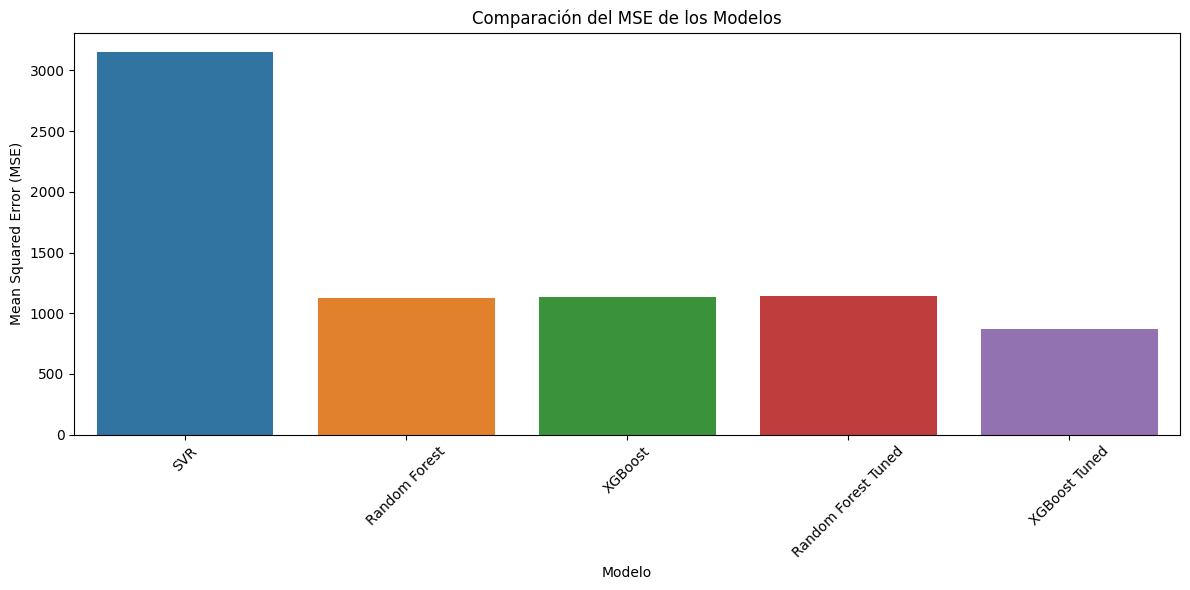

'/dengue_predictions.csv'

In [108]:
# Cargando el conjunto de datos de prueba para la predicción

df_features_test = pd.read_csv('/dengue_features_test.csv')

# Preparación y limpieza del conjunto de datos de prueba (similar a la realizada en el conjunto de entrenamiento)
df_test = df_features_test.select_dtypes(include=[float, int])
df_test.fillna(df_test.mean(), inplace=True)

# Estandarización de los datos de prueba
X_test_final = scaler.transform(df_test)

# Utilizando el modelo XGBoost ajustado para hacer predicciones en el conjunto de prueba
y_pred_test = xgboost_tuned.predict(X_test_final)

# Creando un DataFrame con las predicciones
df_predictions = pd.DataFrame({
    'city': df_features_test['city'],
    'year': df_features_test['year'],
    'weekofyear': df_features_test['weekofyear'],
    'total_cases_predicted': y_pred_test
})

# Guardando las predicciones en un archivo CSV
output_file_path = '/dengue_predictions.csv'
df_predictions.to_csv(output_file_path, index=False)

# Visualizando gráficas de los resultados de la comparación de los modelos
# Preparación de datos para la gráfica
df_performance_combined = pd.concat([df_performance, df_performance_tuned])
df_performance_combined.reset_index(inplace=True)

# Gráfica de barras para comparar el rendimiento de los modelos
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', data=df_performance_combined)
plt.title('Comparación del MSE de los Modelos')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

output_file_path